In [1]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader

import os
from pycocotools.coco import COCO

In [2]:
dataDir='/home/awatras/Datasets/cocoapi'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [3]:
import torchvision.datasets as dset

ds = dset.CocoDetection(root = '/home/awatras/Datasets/cocoapi/images/val2017', annFile=annFile)

loading annotations into memory...
Done (t=0.86s)
creating index...
index created!


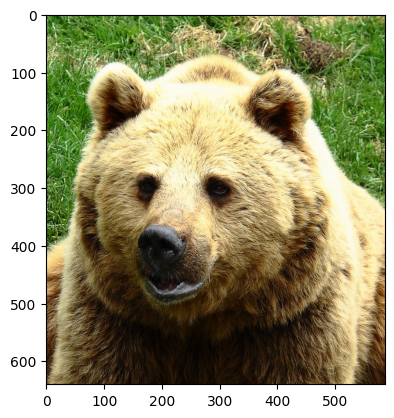

[1.43, 68.81, 584.57, 563.94]


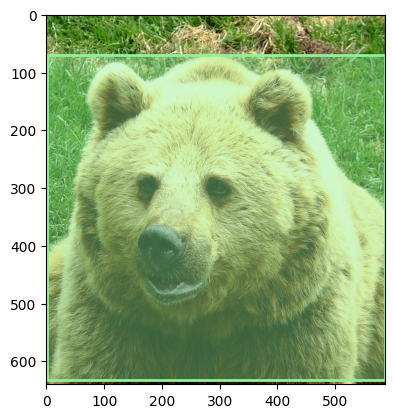

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

img = ds[1][0]
plt.imshow(img)
plt.show()

ann = ds[1][1][0]
polygons = []
color = []
c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]
#for seg in ann['segmentation']:
#    poly = np.array(seg).reshape((int(len(seg)/2), 2))
#    polygons.append(Polygon(poly))
#    color.append(c)
print(ann['bbox'])
[bbox_x, bbox_y, bbox_w, bbox_h] = ann['bbox']
poly = [[bbox_x, bbox_y], [bbox_x, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y]]
np_poly = np.array(poly).reshape((4,2))
polygons.append(Polygon(np_poly))
color.append(c)

plt.imshow(img)
ax = plt.gca()
p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.4)
ax.add_collection(p)
p = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=2)
ax.add_collection(p)
plt.show()

[1.43, 68.81, 584.57, 563.94]
Crop Width: 387, Crop Height: 394
Crop X Min: 88, Crop Y Min: 114
[1.43, 68.81, 584.57, 563.94]
bbox: [0, 0, 387, 394]
<PIL.Image.Image image mode=RGB size=387x394 at 0x7F0A172FB8D0>


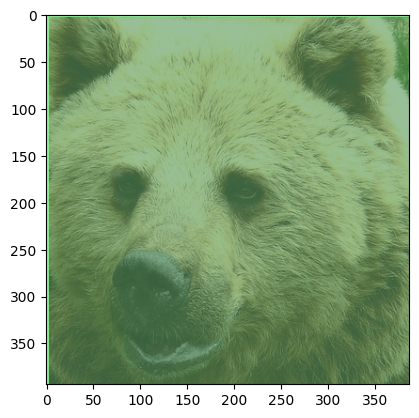

In [5]:
import torchvision
from torchvision.transforms import Resize, Compose, ToTensor
from utils.transforms import RandomCropWithBBox, RandomColorJitterWithBBox

tf = [RandomCropWithBBox(), RandomColorJitterWithBBox()]
bbox = ann['bbox'].copy()
print(bbox)

tf_img = img
tf_bbox = bbox
for t in tf:
    tf_img, tf_bbox = t(tf_img, bbox)
[bbox_x, bbox_y, bbox_w, bbox_h] = tf_bbox
poly = [[bbox_x, bbox_y], [bbox_x, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y]]
np_poly = np.array(poly).reshape((4,2))

plt.imshow(tf_img)
ax = plt.gca()
p = PatchCollection([Polygon(np_poly)], facecolor=color, linewidths=0, alpha=0.4)
ax.add_collection(p)
p = PatchCollection([Polygon(np_poly)], facecolor='none', edgecolors=color, linewidths=2)
ax.add_collection(p)
plt.show()

In [6]:
ds[1][1]

[{'segmentation': [[37.31,
    373.02,
    57.4,
    216.61,
    67.44,
    159.21,
    77.49,
    113.29,
    91.84,
    86.03,
    123.41,
    84.59,
    162.15,
    96.07,
    215.25,
    86.03,
    261.17,
    70.24,
    285.56,
    68.81,
    337.22,
    68.81,
    411.84,
    93.2,
    454.89,
    107.55,
    496.5,
    255.35,
    513.72,
    262.53,
    552.47,
    292.66,
    586.0,
    324.23,
    586.0,
    381.63,
    586.0,
    449.08,
    586.0,
    453.38,
    578.3,
    616.97,
    518.03,
    621.27,
    444.84,
    624.14,
    340.09,
    625.58,
    136.32,
    625.58,
    1.43,
    632.75,
    7.17,
    555.26,
    5.74,
    414.64]],
  'area': 275709.8110500001,
  'iscrowd': 0,
  'image_id': 285,
  'bbox': [1.43, 68.81, 584.57, 563.94],
  'category_id': 23,
  'id': 587562}]

BoundingBoxes([[  1.4300,  68.8100, 584.5700, 563.9400]], format=BoundingBoxFormat.XYWH, canvas_size=(640, 586))
BoundingBoxes([[  0.0000,   3.6394, 448.0000, 444.3606]], format=BoundingBoxFormat.XYWH, canvas_size=(448, 448))


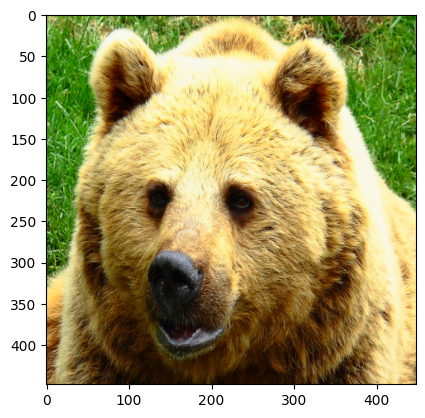

In [7]:
from torchvision.transforms.v2 import Compose, RandomResizedCrop, ColorJitter, Resize
import torchvision.transforms.v2 as v2
from torchvision import tv_tensors
import numpy as np

tf_bbox = 0
img = ds[1][0]
bbox = tv_tensors.BoundingBoxes([x['bbox'] for x in ds[1][1]], format='XYWH', canvas_size = (img.size[1], img.size[0]))
label = ds[1][1][0]['category_id']
print(bbox)

tf = Compose([v2.ToImage(), RandomResizedCrop(size=(448,448)), ColorJitter(brightness = 0.5, contrast = 0, saturation = 0.5, hue = 0.0)])

state = torch.get_rng_state()
tf_img, tf_bbox, = tf(img, bbox)

print(tf_bbox)
plt.imshow(tf_img.permute(1,2,0))
plt.show()

BoundingBoxes([[  1.4300,  68.8100, 584.5700, 563.9400],
               [  1.4300,  68.8100, 584.5700, 563.9400]], format=BoundingBoxFormat.XYWH, canvas_size=(640, 586))
1
tensor(0.)
2
tensor(0.)


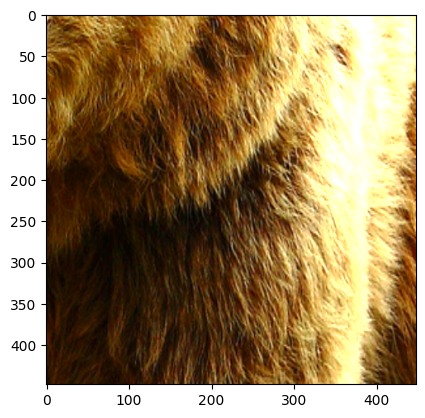

In [8]:
bbox = tv_tensors.BoundingBoxes([x['bbox'] for x in ds[1][1]]*2, format='XYWH', canvas_size = (img.size[1], img.size[0]))
print(bbox)

tf_img, tf_bbox, = tf(img, bbox)
for box, y in zip(tf_bbox, [1,2]):
    print(y)
    print(box[0])

plt.imshow(tf_img.permute(1,2,0))
plt.show()

In [9]:
to_image = v2.ToImage()

to_image(img).shape

torch.Size([3, 640, 586])

In [10]:
from utils.YoloCocoDataset import YOLO_COCO_DATASET

ds2 = YOLO_COCO_DATASET('/home/awatras/Datasets/cocoapi/images/val2017', annFile, transform=tf)

loading annotations into memory...
Done (t=0.71s)
creating index...
index created!


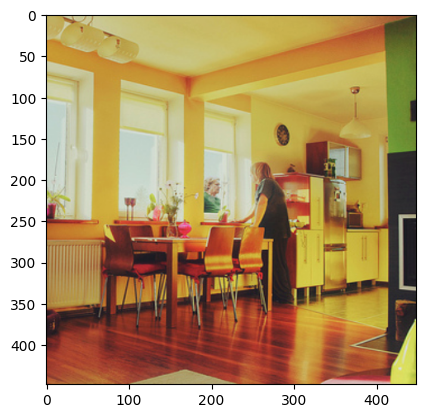

7


In [11]:
img, anns = ds2[0]
plt.imshow(img.permute(1,2,0))
plt.show()

print(len(anns))

In [12]:
from torch.utils.data import DataLoader

dl = DataLoader(ds2, 64, True)

In [13]:
for x,y in dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([64, 3, 448, 448])
torch.Size([64, 7, 7, 170])


In [14]:
bbox = tv_tensors.BoundingBoxes([100,200,300,400], format='XYWH', canvas_size=(640,586))
grid_x = bbox[0][1] // 64
delta_x = (bbox[0][1] - grid_x * 64) / 64
print(delta_x)

tensor(0.1250)


In [15]:
l1 = [1,2,3,4,5]
l1[0:-1]

[1, 2, 3, 4]

In [16]:
from backbone.yolov1 import YoloV1Model

model = YoloV1Model()

print(model)

YoloV1Model(
  (conv_layers): Sequential(
    (0): CNNBlock(
      (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leakyrelu): LeakyReLU(negative_slope=0.1)
    )
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): CNNBlock(
      (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leakyrelu): LeakyReLU(negative_slope=0.1)
    )
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): CNNBlock(
      (conv): Conv2d(192, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leakyrelu): LeakyReLU(negative_slope=0.1)
    )
    (5)